# Assignment Netwerkanalyse

## Notebook made by


|Naam|Studentnummer|
|-|-|
| | |
| | |
| | |
| | |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

Cijfer per student:
 1    5.2
2    9.1
3    8.4
4    5.2
dtype: float64


,1,2,3,4
1,0.20,0.3,0.3,0.20
2,0.25,0.3,0.3,0.15
3,0.20,0.2,0.4,0.20
4,0.10,0.5,0.2,0.20


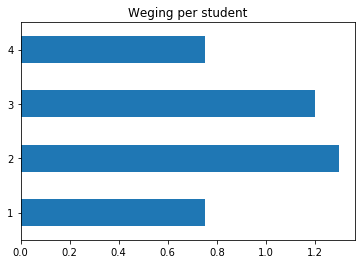

In [1]:
import pandas as pd
%matplotlib inline

def cijfer_per_student(weging,cijfer=7):
    return round(weging*cijfer,1)

weging= {
        1: {1:.2,2:.3,3:.3,4:.2},
        2: {1:.25,2:.3,3:.3,4:.15},
        3: {1:.2,2:.2,3:.4,4:.2},
        4: {1:.1,2:.5,3:.2,4:.2}
        }
# verander hier niks aan
df= pd.DataFrame(weging).T
assert all((df.sum(1)==1).values) # per student moeten de gewichten optellen tot 1
df.sum().plot(kind='barh', title='Weging per student');
print("Cijfer per student:\n",cijfer_per_student(df.sum()))
df

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Q1-logisch-gevolg-(4pts)" data-toc-modified-id="Q1-logisch-gevolg-(4pts)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Q1 logisch gevolg (4pts)</a></span></li><li><span><a href="#Q2-Vreemde-modellen-(4pts)" data-toc-modified-id="Q2-Vreemde-modellen-(4pts)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Q2 Vreemde modellen (4pts)</a></span></li><li><span><a href="#Q3-Conjunctieve-vragen-aan-een-netwerk-(4pts)" data-toc-modified-id="Q3-Conjunctieve-vragen-aan-een-netwerk-(4pts)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Q3 Conjunctieve vragen aan een netwerk (4pts)</a></span></li><li><span><a href="#Q1-logisch-gevolg" data-toc-modified-id="Q1-logisch-gevolg-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Q1 logisch gevolg</a></span></li><li><span><a href="#Q2-Vreemde-modellen" data-toc-modified-id="Q2-Vreemde-modellen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Q2 Vreemde modellen</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Deel-1-(2pt)" data-toc-modified-id="Deel-1-(2pt)-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Deel 1 (2pt)</a></span></li><li><span><a href="#Deel-2-(2pt)" data-toc-modified-id="Deel-2-(2pt)-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Deel 2 (2pt)</a></span></li><li><span><a href="#deel-1" data-toc-modified-id="deel-1-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>deel 1</a></span></li><li><span><a href="#deel-2" data-toc-modified-id="deel-2-5.0.4"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>deel 2</a></span></li></ul></li></ul></li><li><span><a href="#Q3-Conjunctieve-vragen-aan-een-netwerk-(4pt)" data-toc-modified-id="Q3-Conjunctieve-vragen-aan-een-netwerk-(4pt)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Q3 Conjunctieve vragen aan een netwerk (4pt)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Eisen" data-toc-modified-id="Eisen-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span>Eisen</a></span></li></ul></li></ul></li><li><span><a href="#Deel-2" data-toc-modified-id="Deel-2-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Deel 2</a></span></li></ul></li></ul></div>

In [2]:
from typing import Generator
from nose.tools import assert_equal, assert_count_equal
import networkx as nx
%matplotlib inline

# Q1 logisch gevolg (4pts)

* Je maakt een Python programma waaraan je een verzameling premissen $\Sigma$ en een conclusie $\phi$ in propositielogische formules geeft en die teruggeeft of $\Sigma\models\phi$. 
    * In het geval van niet geef je een (of alle) tegenvoorbeelden terug.
    
# Q2 Vreemde modellen (4pts)

* Je maakt vreemde modellen voor je netwerk van familierelaties. Modellen die wel mogen, maar in het echt niet of vrijwel nooit voorkomen. 
* Daarna probeer je die met logische formules te verbieden. Je verzint dus zinnen die *niet waar* zijn op die ongewenste modellen.

# Q3 Conjunctieve vragen aan een netwerk (4pts)

* Een netwerk met feiten (en regels) is natuurlijk ook een database (of een *triple store*), en wat doen we met dat soort dingen? We stellen er vragen aan, en krijgen dan antwoord. Normaal doe je dat in SQL. In deze cursus leer je hoe je dat doet in SPARQL. Later bij Data Science leer je hoe je dat doet met `pandas`. 
* De preciese taal maakt niet, de meeste vragen die je stelt in je leven (en alle andere mensen op aarde) zijn zogenaamde *conjunctive queries*: eerste orde formules van de vorm $\exists \bar{x} (\bigwedge R(x_i,x_j))$. 
    * OK OK, je gebruikt ook nog wel eens het connectief "of", maar dat is makkelijk toe te voegen aanje programma als je dit hebt.
        * (want je kunt alle "of"s naar buiten brengen, en dan heb je dus een grote disjunctie van CQs.
        * die draai je allemaal achter (of naast) elkaar, en neemt de vereniging van de antwoorden.
        * Probeer maar eens een voorbeeld
* Bijvoorbeeld, "wie zijn de grootouders van Henkie?" wordt dan  $\exists z (R(x,z) \wedge R(z,"Henkie"))$. Je kunt dat zelf vast prima in SQL en volgende week in SPARQL zeggen.

# Q1 logisch gevolg

* We werken met de [sympy module](https://docs.sympy.org/latest/modules/logic.html). Dat is erg handig. Neem hem eerst goed door en speel er wat mee.
* In de cel hieronder vind je een handige routine.
* Je gebruikt natuurlijk  de definitie van $\Sigma\models\phi$, van logisch gevolg dus.
* En daarvoor is de `sympy` routine `satisfiable` best handig....
* De tests in de antwoord cel gaven bij mij dit:
<pre>
{p, q | ~p} q True
{q, q | ~p} p [{q: True, p: False}]
{q, Implies(p, q)} p {q: True, p: False}
{q & (r | s), Implies(p, q)} p [{q: True, r: True, s: True, p: False}, {q: True, r: True, s: False, p: False}, {q: True, s: True, r: False, p: False}]
WARNING: All proposition letters in the Conclusion should occur in some formula of the Premisses.
</pre>

In [3]:
from sympy import *
from sympy.logic.inference import satisfiable

p,q,r,s,t = symbols('p q r s t')

def maakconjunctie(P):
    '''Creates a conjunction from a set or list of formulas.'''
    P=list(P)
    if P:
        return P[0]&maakconjunctie(P[1:])
    else:
        return True
#test
maakconjunctie({p, ~p |q, p|(p&q)})    

p & (q | ~p) & (p | (p & q))

In [4]:
def implies(Premisses, Conclusion, allmodels=False):
    '''Return True if Conclusion follows from Premisses, 
    return a (or all) countermodel(s) otherwise. '''
    P= maakconjunctie(Premisses)
    
    if not Conclusion.atoms().issubset(P.atoms()):
        print('WARNING: All proposition letters in the Conclusion should occur in some formula of the Premisses.')
        raise
    else:
    # YOUR CODE HERE
        vervulbaar = satisfiable(P, all_models=allmodels)
        if allmodels == True:
            tegenvoorbeelden = []

            for i in vervulbaar:
                if i[Conclusion] == False:
                    tegenvoorbeelden.append(i)

            if not tegenvoorbeelden:
                return True
            return tegenvoorbeelden
        else:
            if len(vervulbaar)==1:
                return True
            else:
                return vervulbaar
#TEST
P= {~p|q,p}
C= q   

print(P, C, implies(P,C, allmodels=True ))
P= {~p|q,q}
C= p   

print(P, C, implies(P,C, allmodels=True ))

P= {p>>q,q}  # andere manier om implicatie te schrijven
C= p   

print(P, C, implies(P,C))

P= {p>>q,q,(r|s)}  # andere manier om implicatie te schrijven
C= p 

print(P, C, implies(P,C, allmodels=True ))
P= {p>>q,q}  # andere manier om implicatie te schrijven
C= r


# {p, q | ~p} q True
# {q, q | ~p} p [{q: True, p: False}]
# {q, Implies(p, q)} p {q: True, p: False}
# {q & (r | s), Implies(p, q)} p [{q: True, r: True, s: True, p: False}, {q: True, r: True, s: False, p: False}, {q: True, s: True, r: False, p: False}]

# implies(P,C) #Dit geeft een error. Probeer het ook zelf

{p, q | ~p} q True
{q, q | ~p} p [{q: True, p: False}]
{q, Implies(p, q)} p {q: True, p: False}
{q, r | s, Implies(p, q)} p [{q: True, r: True, s: True, p: False}, {q: True, r: True, s: False, p: False}, {q: True, s: True, r: False, p: False}]


In [5]:
assert_equal(type(implies({p},p)), bool)
assert_equal(type(implies({p|q},p)), dict)
assert_equal(type(implies({p|q},p, allmodels=True)), list)


# Q2 Vreemde modellen

### Deel 1 (2pt)
1. Je maakt vreemde modellen voor je netwerk van familierelaties. Modellen die wel mogen, maar in het echt niet of vrijwel nooit voorkomen. 
2. Daarna probeer je die met logische formules te verbieden. Je verzint dus zinnen die *niet waar* zijn op die ongewenste modellen.

In ieder geval verzin je zinnen die de volgende vijf modellen verbieden (die soort $\Sigma$ bij een knoop is eigenlijk een M en staat voor Man. Gebruik dus weer de predicaatlogische relaties $R,M,V$ in die zinnen, en niks anders. Geef duidelijk aan welk model je met welke zin verbiedt.

![](vreemd.jpg)

### Deel 2 (2pt)

Ga nu verder en verzin nog meer modellen die je zou willen verbieden. Misschien vindt je er wel oneindig veel! Kan je daar een zin die die allemaal verbiedt voor vinden? Kan je het met oneindig veel zinnen? Geef ze!

**Je antwoorden zijn keurige Latex formules, en natuurlijk wel gevormd, met nette haakjes etc.**

**Voor je modellen, maak je plaatjes in netwerkx, met de hand, of iets anders, als het maar heel duidelijk is (en dus niet zo als die in deze opgave ;-)**

Eerst de vijf uit het plaatje:<br/>
linksboven: Afgebeeld: twee mannen x en y zijn ouder van z. Wat het moet zijn: twee mannen x en y mogen geen ouder zijn van z.<br/>
$\forall xy (M(x) \wedge M(y) \wedge x \neq y \implies \neg \exists z(R(x,z) \wedge R(y,z))$<br/>

Rechtsboven: Afgebeeld: Iemand is ouder van zichzelf. Wat het moet zijn: niemand mag ouder zijn van zichzelf.<br/>
$\forall x (\neg R(x,x))$<br/>

Midden: Afgebeeld: Iemand kan ouder zijn van zijn/haar kleinkind. Wat het moet zijn: Niemand mag ouder zijn van zijn/haar kleinkind.<br/>
$\forall xyz (R(x,y) \wedge R(z,x) \implies \neg R(z,y))$<br/>

Linksonder: Afgebeeld: Een kleinkind kan de ouder zijn van de grootouder. Wat het moet zijn: niemand mag ouder van zijn/haar grootouder zijn.<br/>
$$\forall xyz (R(x,y) \wedge R(z,x) \implies \neg R(y,z))$<br/>

Rechtsonder: Afgebeeld: Iemand mag ouder zijn van zijn/haar ouder. Wat het moet zijn: Niemand mag ouder zijn van zijn/haar ouder.<br/>
$\forall xy (R(x,y) \implies \neg R(y,x))$



Twee vrouwen hebben een kind:<br/>
$\forall xy (V(x) \wedge V(y) \wedge x \neq y \implies \neg \exists z(R(x,z) \wedge R(y,z))$<br/>



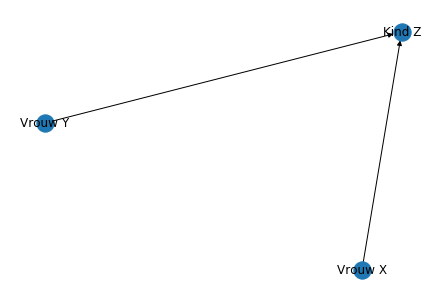

In [6]:
#DIT MAG DUS NIET VOORKOMEN
TweeMoederGraaf = nx.DiGraph()
TweeMoederEdges = {('Vrouw X', 'Kind Z'), ('Vrouw Y', 'Kind Z')}
TweeMoederGraaf.add_edges_from(TweeMoederEdges)
nx.draw(TweeMoederGraaf, with_labels=True)

Moeder en vader mogen geen gemeenschappelijke ouder hebben (oftewel ouders mogen geen broers/zussen van elkaar zijn)<br/>
$\forall xyz  (R(x,z) \wedge R(y,z) \implies \neg \exists a (R(a,x) \wedge R(a,y)))$<br/>


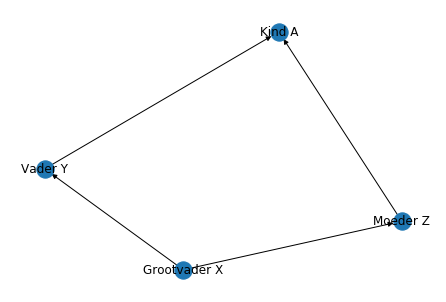

In [7]:
#DIT MAG DUS NIET VOORKOMEN
OuderSiblingGraaf = nx.DiGraph()
OuderSiblingEdges = {("Grootvader X","Vader Y"),("Grootvader X","Moeder Z"),("Vader Y","Kind A"),("Moeder Z","Kind A")}
OuderSiblingGraaf.add_edges_from(OuderSiblingEdges)
nx.draw(OuderSiblingGraaf,with_labels=True)

Iedereen heeft twee ouders<br/>
$\forall xyz (R(x,z) \wedge R(y,z) \wedge x \neq y  \implies \neg \exists a (R(a,z) \wedge a \neq (x \vee y)))$

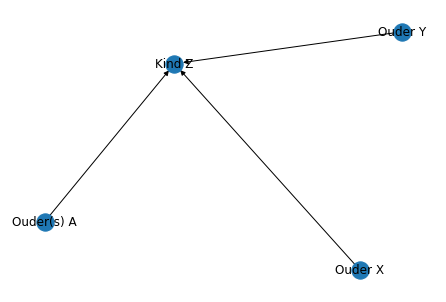

In [8]:
#DIT MAG DUS NIET VOORKOMEN
DrieOudersGraaf = nx.DiGraph()
DrieOudersEdges = {("Ouder X","Kind Z"),("Ouder Y","Kind Z"), ('Ouder(s) A', 'Kind Z')}
DrieOudersGraaf.add_edges_from(DrieOudersEdges)
nx.draw(DrieOudersGraaf,with_labels=True)
(aa)


# Q3 Conjunctieve vragen aan een netwerk (4pt)

* Een netwerk met feiten (en regels) is natuurlijk ook een database (of een *triple store*), en wat doen we met dat soort dingen? We stellen er vragen aan, en krijgen dan antwoord. Normaal doe je dat in SQL. In deze cursus leer je hoe je dat doet in SPARQL. Later bij Data Science leer je hoe je dat doet met `pandas`. 
* De preciese taal maakt niet, de meeste vragen die je stelt in je leven (en alle andere mensen op aarde) zijn zogenaamde *conjunctive queries*: eerste orde formules van de vorm $\exists \bar{x} (\bigwedge R(x_i,x_j))$. 
* Bijvoorbeeld, "wie zijn de grootouders van Henkie?" wordt dan  $\exists z (R(x,z) \wedge R(z,"Henkie"))$. Je kunt dat zelf vast prima in SQL en volgende week in SPARQL zeggen.
* Een *conjucntieve query* kan je ook zien als een netwerk! Als een voorbeeld netwerkje.
    * $R(x,y)\wedge R(y,z) \wedge R(x,z)$ vraagt om alle "driehoekjes"
    * Dat kan ik ook zeggen als dit netwerk (ja ik weet dat dit ongericht is, en wij alles gericht doen, maar dat laat ik aan jullie over)
<pre>
A = nx.Graph()
A.add_edges_from([('x','y'),('x','z'),('x','z')])
</pre>
* Het **antwoord** op deze vraag gegeven een netwerk `M` is dan alle deelnetwerken van `M` die isomorf zijn met `A` (plus natuurlijk hoe de knopen in `M` dan gematched worden met de "knopen" (= variabelen) in `A`.
* Programmeer dit in networkx.
* Het antwoord is verbazend simpel, uiteindelijk. Denk eerst na, ga dan gericht zoeken!

#### Eisen
* `CQ` kan werken op `nx.Digraphs` met boolse attributen op de knopen, en 1 relatie. 
* Dus vergelijkbaar met je ouder database (maar dan heb je twee boolse attributen). Je hebt dus een attribuut voor elke 1 plaatsige relatie.
* Je kan ervan uitgaan dat de query graaf altijd in de "taal" geschreven is van de model graaf.
* Let op: je hoeft de projectie niet te doen in CQ. Dus je vraag is  altijd  equivalent aan een een conjunctie van atomen (dus zonder existentiele quantifier (dat is namelijk de projectie in DB termen)).

## Deel 2

* Hoe kostbaar is deze manier van vragen beantwoorden? 
    * Probeer het eens uit te rekenen als functie van  het aantal knopen in het Model netwerk en in het vraag netwerk. 
    * Heftig?
    * Zou het beter kunnen?
    * Zou het echt beter kunnen?
    * Zoek eens op hoe lastig dit probleem eigenlijk is. Had je niet gedacht he?


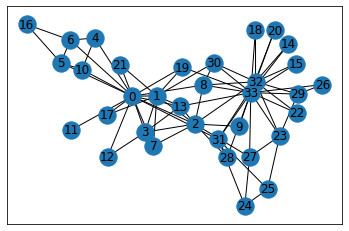

In [49]:
import itertools
G= nx.karate_club_graph()
nx.draw_networkx(G)

# Geef me alle driehoekjes in G. Ik vond 270 verschillende.
A = nx.Graph()
A.add_edges_from([('x','y'),('x','z'),('y','z')])

In [53]:
    stuff = [x for x in range(30)]
    for L in range(0, 5):
        for subset in itertools.combinations(stuff, L):
            if len(subset) ==len(A.nodes()):
                print(subset)

(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 1, 10)
(0, 1, 11)
(0, 1, 12)
(0, 1, 13)
(0, 1, 14)
(0, 1, 15)
(0, 1, 16)
(0, 1, 17)
(0, 1, 18)
(0, 1, 19)
(0, 1, 20)
(0, 1, 21)
(0, 1, 22)
(0, 1, 23)
(0, 1, 24)
(0, 1, 25)
(0, 1, 26)
(0, 1, 27)
(0, 1, 28)
(0, 1, 29)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 2, 10)
(0, 2, 11)
(0, 2, 12)
(0, 2, 13)
(0, 2, 14)
(0, 2, 15)
(0, 2, 16)
(0, 2, 17)
(0, 2, 18)
(0, 2, 19)
(0, 2, 20)
(0, 2, 21)
(0, 2, 22)
(0, 2, 23)
(0, 2, 24)
(0, 2, 25)
(0, 2, 26)
(0, 2, 27)
(0, 2, 28)
(0, 2, 29)
(0, 3, 4)
(0, 3, 5)
(0, 3, 6)
(0, 3, 7)
(0, 3, 8)
(0, 3, 9)
(0, 3, 10)
(0, 3, 11)
(0, 3, 12)
(0, 3, 13)
(0, 3, 14)
(0, 3, 15)
(0, 3, 16)
(0, 3, 17)
(0, 3, 18)
(0, 3, 19)
(0, 3, 20)
(0, 3, 21)
(0, 3, 22)
(0, 3, 23)
(0, 3, 24)
(0, 3, 25)
(0, 3, 26)
(0, 3, 27)
(0, 3, 28)
(0, 3, 29)
(0, 4, 5)
(0, 4, 6)
(0, 4, 7)
(0, 4, 8)
(0, 4, 9)
(0, 4, 10)
(0, 4, 11)
(0, 4, 12)
(0, 4, 13)
(0, 4, 14)
(0, 4, 15)
(0, 4, 16)
(0,

(4, 27, 28)
(4, 27, 29)
(4, 28, 29)
(5, 6, 7)
(5, 6, 8)
(5, 6, 9)
(5, 6, 10)
(5, 6, 11)
(5, 6, 12)
(5, 6, 13)
(5, 6, 14)
(5, 6, 15)
(5, 6, 16)
(5, 6, 17)
(5, 6, 18)
(5, 6, 19)
(5, 6, 20)
(5, 6, 21)
(5, 6, 22)
(5, 6, 23)
(5, 6, 24)
(5, 6, 25)
(5, 6, 26)
(5, 6, 27)
(5, 6, 28)
(5, 6, 29)
(5, 7, 8)
(5, 7, 9)
(5, 7, 10)
(5, 7, 11)
(5, 7, 12)
(5, 7, 13)
(5, 7, 14)
(5, 7, 15)
(5, 7, 16)
(5, 7, 17)
(5, 7, 18)
(5, 7, 19)
(5, 7, 20)
(5, 7, 21)
(5, 7, 22)
(5, 7, 23)
(5, 7, 24)
(5, 7, 25)
(5, 7, 26)
(5, 7, 27)
(5, 7, 28)
(5, 7, 29)
(5, 8, 9)
(5, 8, 10)
(5, 8, 11)
(5, 8, 12)
(5, 8, 13)
(5, 8, 14)
(5, 8, 15)
(5, 8, 16)
(5, 8, 17)
(5, 8, 18)
(5, 8, 19)
(5, 8, 20)
(5, 8, 21)
(5, 8, 22)
(5, 8, 23)
(5, 8, 24)
(5, 8, 25)
(5, 8, 26)
(5, 8, 27)
(5, 8, 28)
(5, 8, 29)
(5, 9, 10)
(5, 9, 11)
(5, 9, 12)
(5, 9, 13)
(5, 9, 14)
(5, 9, 15)
(5, 9, 16)
(5, 9, 17)
(5, 9, 18)
(5, 9, 19)
(5, 9, 20)
(5, 9, 21)
(5, 9, 22)
(5, 9, 23)
(5, 9, 24)
(5, 9, 25)
(5, 9, 26)
(5, 9, 27)
(5, 9, 28)
(5, 9, 29)
(5, 10, 11)
(5, 10, 12)


(19, 22, 25)
(19, 22, 26)
(19, 22, 27)
(19, 22, 28)
(19, 22, 29)
(19, 23, 24)
(19, 23, 25)
(19, 23, 26)
(19, 23, 27)
(19, 23, 28)
(19, 23, 29)
(19, 24, 25)
(19, 24, 26)
(19, 24, 27)
(19, 24, 28)
(19, 24, 29)
(19, 25, 26)
(19, 25, 27)
(19, 25, 28)
(19, 25, 29)
(19, 26, 27)
(19, 26, 28)
(19, 26, 29)
(19, 27, 28)
(19, 27, 29)
(19, 28, 29)
(20, 21, 22)
(20, 21, 23)
(20, 21, 24)
(20, 21, 25)
(20, 21, 26)
(20, 21, 27)
(20, 21, 28)
(20, 21, 29)
(20, 22, 23)
(20, 22, 24)
(20, 22, 25)
(20, 22, 26)
(20, 22, 27)
(20, 22, 28)
(20, 22, 29)
(20, 23, 24)
(20, 23, 25)
(20, 23, 26)
(20, 23, 27)
(20, 23, 28)
(20, 23, 29)
(20, 24, 25)
(20, 24, 26)
(20, 24, 27)
(20, 24, 28)
(20, 24, 29)
(20, 25, 26)
(20, 25, 27)
(20, 25, 28)
(20, 25, 29)
(20, 26, 27)
(20, 26, 28)
(20, 26, 29)
(20, 27, 28)
(20, 27, 29)
(20, 28, 29)
(21, 22, 23)
(21, 22, 24)
(21, 22, 25)
(21, 22, 26)
(21, 22, 27)
(21, 22, 28)
(21, 22, 29)
(21, 23, 24)
(21, 23, 25)
(21, 23, 26)
(21, 23, 27)
(21, 23, 28)
(21, 23, 29)
(21, 24, 25)
(21, 24, 26)

In [102]:
import itertools

def CQ(Model,Query):
    '''Returns a generator of dicts, where each dict is a bijective mapping from  nodes in Model
    to all nodes in  Query.
    The keys are the model nodes.
    The set of dict values equals the set of nodes of Query.
    The generator returns all answers to the Query on this Model.'''
    subsets = [subset for L in range(len(Query)+1) for subset in itertools.permutations(Model.nodes(), L) 
               if len(subset) == len(Query)]

    for x in subsets:
        Grf = Model.subgraph(x)

        if nx.is_isomorphic(Grf,Query):
            yield {x:set(Query.nodes())}
            #yield {tuple(Grf.nodes()):tuple(Query.nodes())}
            
#             yield {(node for node in Grf.nodes()):(Query.nodes())}


#test
print(len(list(CQ(G,A))))
for antwoord in CQ(G,A):
    print(antwoord)


270
{(0, 1, 2): {'x', 'y', 'z'}}
{(0, 1, 3): {'x', 'y', 'z'}}
{(0, 1, 7): {'x', 'y', 'z'}}
{(0, 1, 13): {'x', 'y', 'z'}}
{(0, 1, 17): {'x', 'y', 'z'}}
{(0, 1, 19): {'x', 'y', 'z'}}
{(0, 1, 21): {'x', 'y', 'z'}}
{(0, 2, 1): {'x', 'y', 'z'}}
{(0, 2, 3): {'x', 'y', 'z'}}
{(0, 2, 7): {'x', 'y', 'z'}}
{(0, 2, 8): {'x', 'y', 'z'}}
{(0, 2, 13): {'x', 'y', 'z'}}
{(0, 3, 1): {'x', 'y', 'z'}}
{(0, 3, 2): {'x', 'y', 'z'}}
{(0, 3, 7): {'x', 'y', 'z'}}
{(0, 3, 12): {'x', 'y', 'z'}}
{(0, 3, 13): {'x', 'y', 'z'}}
{(0, 4, 6): {'x', 'y', 'z'}}
{(0, 4, 10): {'x', 'y', 'z'}}
{(0, 5, 6): {'x', 'y', 'z'}}
{(0, 5, 10): {'x', 'y', 'z'}}
{(0, 6, 4): {'x', 'y', 'z'}}
{(0, 6, 5): {'x', 'y', 'z'}}
{(0, 7, 1): {'x', 'y', 'z'}}
{(0, 7, 2): {'x', 'y', 'z'}}
{(0, 7, 3): {'x', 'y', 'z'}}
{(0, 8, 2): {'x', 'y', 'z'}}
{(0, 10, 4): {'x', 'y', 'z'}}
{(0, 10, 5): {'x', 'y', 'z'}}
{(0, 12, 3): {'x', 'y', 'z'}}
{(0, 13, 1): {'x', 'y', 'z'}}
{(0, 13, 2): {'x', 'y', 'z'}}
{(0, 13, 3): {'x', 'y', 'z'}}
{(0, 17, 1): {'x', 'y', 

In [100]:
def CQ(Model,Query):
    '''Returns a generator of dicts, where each dict is a bijective mapping from  nodes in Model
    to all nodes in  Query.
    The keys are the model nodes.
    The set of dict values equals the set of nodes of Query.
    The generator returns all answers to the Query on this Model.'''
#     lijst = []
#     for nodea in Model.nodes():
#         for nodeb in Model.nodes():
#             for nodA in Query.nodes():
#                 for nodB in Query.nodes():
#                     if Model.has_edge(nodea,nodeb) and Query.has_edge(nodA,nodB):
#                         for nodec in Model.nodes():
#                             if Model.has_edge(nodea,nodec) and Model.has_edge(nodeb,nodec):
#                                 for nodC in Query.nodes():
#                                     if Query.has_edge(nodA,nodC) and Query.has_edge(nodB,nodC):
#                                         #print({(nodea,nodeb,nodec):(nodA,nodB,nodC)})
    for L in range(len(Query) + 1):
        for subset in itertools.permutations(Model.nodes(), L):
            if len(subset) == len(Query):
                Grf = Model.subgraph(subset)
                if nx.is_isomorphic(Grf,Query):
                    yield {tuple(Grf.nodes()):tuple(Query.nodes())}
    

#     stuff = [x for x in range(30)]
#     for L in range(0, 5):
#         for subset in itertools.combinations(stuff, L):
#             if len(subset) == 4:
#                 print(subset)
#     stuff = [x for x in Model.nodes()]
#     for L in range(len(Query.nodes())):
#         for subset in itertools.combinations(stuff, L):
#             if len(subset) ==len(Query.nodes()):
#                 print(subset)

    
                                    
                        
                    
                

#test
print(len(list(CQ(G,A))))
for antwoord in CQ(G,A):
    print(antwoord)

    

270
{(0, 1, 2): ('x', 'y', 'z')}
{(0, 1, 3): ('x', 'y', 'z')}
{(0, 1, 7): ('x', 'y', 'z')}
{(0, 1, 13): ('x', 'y', 'z')}
{(0, 1, 17): ('x', 'y', 'z')}
{(0, 1, 19): ('x', 'y', 'z')}
{(0, 1, 21): ('x', 'y', 'z')}
{(0, 1, 2): ('x', 'y', 'z')}
{(0, 2, 3): ('x', 'y', 'z')}
{(0, 2, 7): ('x', 'y', 'z')}
{(0, 8, 2): ('x', 'y', 'z')}
{(0, 2, 13): ('x', 'y', 'z')}
{(0, 1, 3): ('x', 'y', 'z')}
{(0, 2, 3): ('x', 'y', 'z')}
{(0, 3, 7): ('x', 'y', 'z')}
{(0, 3, 12): ('x', 'y', 'z')}
{(0, 3, 13): ('x', 'y', 'z')}
{(0, 4, 6): ('x', 'y', 'z')}
{(0, 10, 4): ('x', 'y', 'z')}
{(0, 5, 6): ('x', 'y', 'z')}
{(0, 10, 5): ('x', 'y', 'z')}
{(0, 4, 6): ('x', 'y', 'z')}
{(0, 5, 6): ('x', 'y', 'z')}
{(0, 1, 7): ('x', 'y', 'z')}
{(0, 2, 7): ('x', 'y', 'z')}
{(0, 3, 7): ('x', 'y', 'z')}
{(0, 8, 2): ('x', 'y', 'z')}
{(0, 10, 4): ('x', 'y', 'z')}
{(0, 10, 5): ('x', 'y', 'z')}
{(0, 3, 12): ('x', 'y', 'z')}
{(0, 1, 13): ('x', 'y', 'z')}
{(0, 2, 13): ('x', 'y', 'z')}
{(0, 3, 13): ('x', 'y', 'z')}
{(0, 17, 1): ('x', 'y', 

In [62]:
assert isinstance(CQ(G,A),Generator)


In [94]:
# n is number of total nodes
# a is length of query nodes
n = 34
a = 3
print("er zijn", factorial(n)/factorial(n-a), "verschillende combinaties")

er zijn 35904 verschillende combinaties
